# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 4</p>
### <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Wed, **Nov, 3rd** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Vishal Gupta

EID: vg22846

Name: Kaushik Kumaran

EID: kk34537

# Question 1: Reject option (10 pts)

Consider a binary classification problem with the following loss matrix, where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C_1 & C_2 & Reject\\
   \text{True class} & C_1 & 0 & 2 & c  \\
   & C_2 & 4 & 0 & c \\
  \end{array} } 
$$

If $c$ = 1, determine the respective predicted classes that will minimize the expected loss when $P(C_1|x)$ falls in different value intervals. That is, please give the decision rules for $C_1$, $C_2$ and $Reject$.

## Answer:

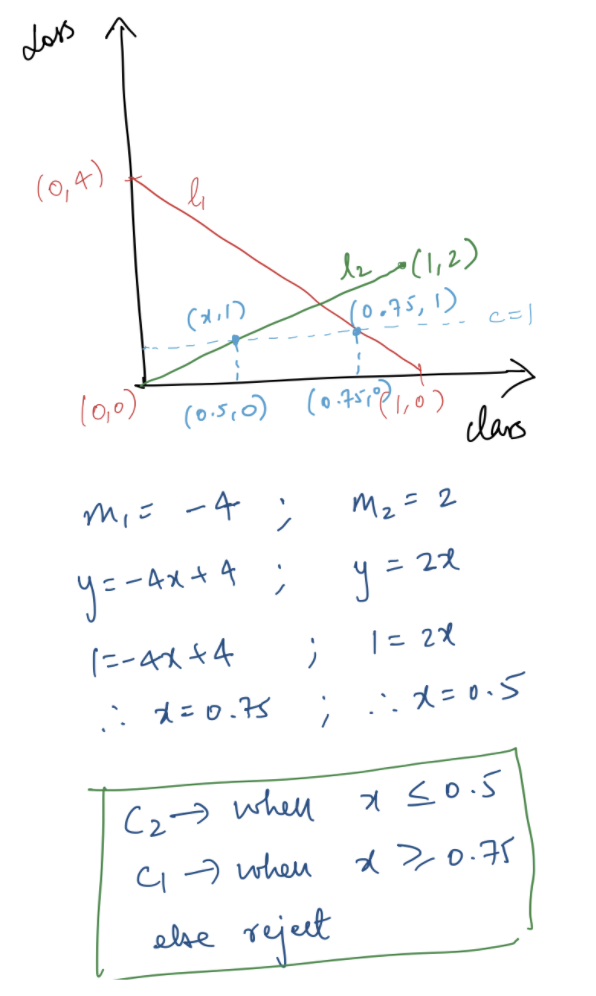

Decision rules for C1, C2, Reject will be based on the loss at that point. The classification rule will be based on the minimum loss of decision options in the region. Looking at the calculation for obtaining the region in the image (attached above), the decision rule is as below - 
* Predict $C_2$ when *P($C_1$|X) $\leq$ 0.5*
* Predict Reject when *0.5 $<$ P($C_1$|X) $<$ 0.75*
* Predict $C_1$ when *P($C_1$|X) $\geq$ 0.75*

# Question 2: Logistic Regression (15 pts) 

Logistic regression has been traditionally used to classify data when a **linear decision boundary** is adequate. However, having an idea of what the distribution looks like could help one come up with a smart data transformation trick that could make the optimal decision boundary become (near) linear in the transformed space. In this question, you are given 2-dimensional data, and each data point belongs to either class 0 or class 1. 

a) **(5 pts)** Train a logistic regression classifier using X_train, y_train. Use the trained model to make predictions on X_train, X_test respectively, and then report the accuracies and F1-scores. Sklearn has a very nice [utility](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that helps compute the precision, recall, accuracy and F1-scores. 

b) **(5 pts)** Plot the X_train data using matplotlib, use different colors to represent different classes. Comment on the pattern of data distributions, and reason why the logistic regression classifier in (a) does not perform very well.  

c) **(5 pts)** Transform the input X_train and X_test data in such a way that a linear decision boundary will be effective. Train a new logistic regression classifier on this transformed X_train data. Use the trained model to make predictions on transformed X_train, transformed X_test respectively, and then report the accuracies and F1-scores. 

**Hint**: Carefully analyze the plot you made in (b), observe the decision boundaries, which should guide you towards the right direction.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult.csv
Saving diabetes-2.csv to diabetes-2.csv
Saving q2_data.npy to q2_data.npy


In [ ]:
import numpy as np

data = np.load('q2_data.npy', allow_pickle=True)

X_train, y_train = data.item().get('X_train'), data.item().get('y_train')
X_test, y_test = data.item().get('X_test'), data.item().get('y_test')

## Answer:

### Part a

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# fitting a logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# getting prediction from model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# getting classification report summary
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.71      1.00      0.83       214
        True       0.00      0.00      0.00        86

    accuracy                           0.71       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.51      0.71      0.59       300

              precision    recall  f1-score   support

       False       0.69      1.00      0.82        69
        True       0.00      0.00      0.00        31

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Part b

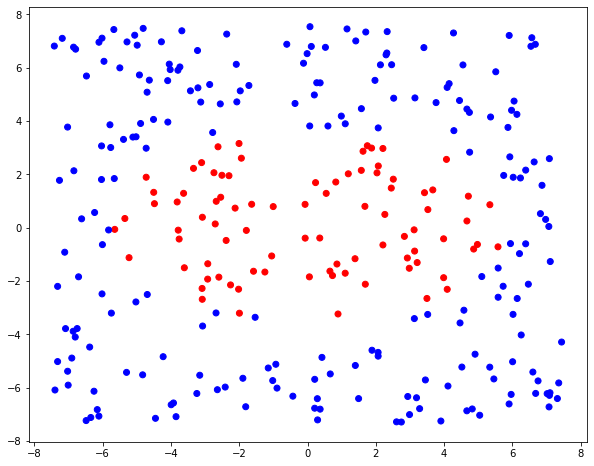

In [ ]:
from matplotlib import pyplot as plt

# plot x1 and x2 with class labels
color = ['red' if y == True else 'blue' for y in y_train]
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], color=color)
plt.show()

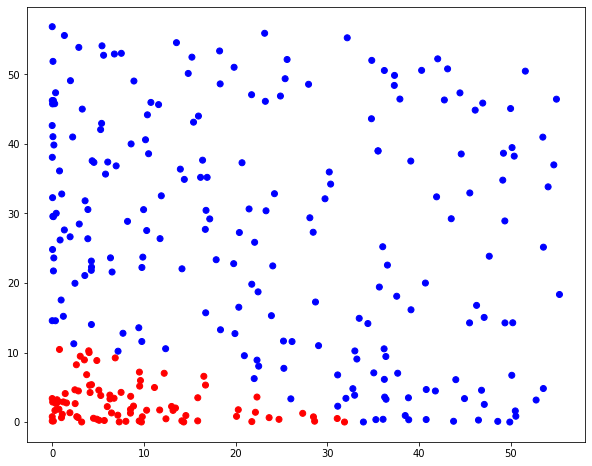

In [ ]:
# taking square of X1 and X2 as non-linear transformation
X_train_transformed1 = X_train.copy()
color = ['red' if y == True else 'blue' for y in y_train]
plt.figure(figsize=(10, 8))
plt.scatter(np.square(X_train_transformed1[:, 0], X_train_transformed1[:, 0]), 
            np.square(X_train_transformed1[:, 1], X_train_transformed1[:, 1]), color=color)
plt.show()

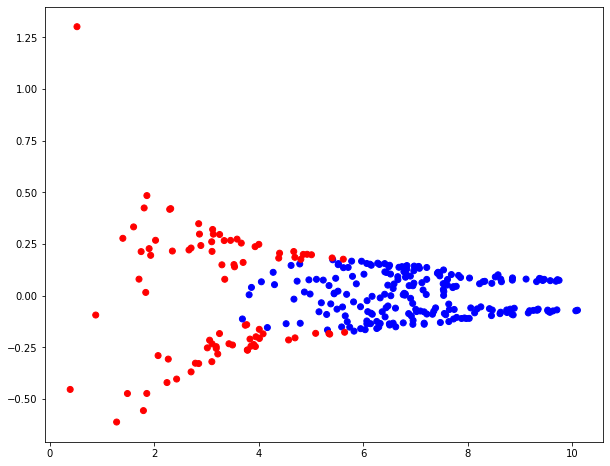

In [ ]:
# taking eulers representation of X1 and X2 as non-linear transformation
X_train_transformed2 = X_train.copy()
x1 = np.sqrt(
    np.square(X_train_transformed2[:, 0], X_train_transformed2[:, 0]) + 
    np.square(X_train_transformed2[:, 1], X_train_transformed2[:, 1]))
x2 = np.array([np.dot(x, np.array([1, 0]))/np.sqrt(np.square(np.dot(x, x))) for x in X_train])

X_train_transformed2[:, 0] = x1
X_train_transformed2[:, 1] = x2

color = ['red' if y == True else 'blue' for y in y_train]
plt.figure(figsize=(10, 8))
plt.scatter(X_train_transformed2[:, 0], X_train_transformed2[:, 1], color=color)
plt.show()

The original data distribution is radial i.e class 1 in closer to the center while class 2 is predominantly away from the center. Looking at the first plot of X1 and X2 we can say that to accurately classify class 1 and class 2 we need a non-linear decision bounday that is not acheivable using Logistic regression. Hence transformation (non linear) on the input data is needed for Logistic regression to provide a good accuracy.

### Part c

In [ ]:
# fitting a logistic regression
model = LogisticRegression()
model.fit(X_train_transformed1, y_train)

# doing the square transformation
X_test_transformed = X_test.copy()
X_test_transformed[:, 0] = np.square(X_test_transformed[:, 0], X_test_transformed[:, 0]) 
X_test_transformed[:, 1] = np.square(X_test_transformed[:, 1], X_test_transformed[:, 1]) 


# getting prediction from model
y_train_pred = model.predict(X_train_transformed1)
y_test_pred = model.predict(X_test_transformed)

# getting classification report summary
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

model.intercept_, model.coef_

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       214
        True       0.99      0.99      0.99        86

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        69
        True       1.00      1.00      1.00        31

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



(array([23.9492892]), array([[-0.70695984, -1.90548721]]))

# Question 3: Bayesian Network (5 pts)

A Bayesian network is a directed acyclic graph (DAG) that captures a subset of the independence relationships of a given joint probability distribution. 

In a Bayesian network $G=(V,E)$, each node $i \in V$in the directed graph corresponds to a random variable and each directed edge $e \in E$ represents a statistical dependence. Each node is associated with a conditional probability distribution of the corresponding random variables given its parents in the DAG. The joint probability distribution factorizes w.r.t the directed graph $G$ if $p(x_1, ..., x_n)=\prod_{i \in V} p(x_i | x_{parents(i)})$, provided the variables are visited in a topologically sorted order. Please write the joint probability distribution that factorizes w.r.t this graph, in as simple a form as possible (i.e. that results in the smallest possible conditional probability tables:


In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1XigbvsWpNvlols3QarVjDfYf2Dnf3emy/preview" width="640" height="480" allow="autoplay"></iframe>

## Answer:


$$
P(A, B, C, D, E, F) = P(A) * P(B| A) * P(E| B) * P(C| A, E) * P(D| B) * P(F| C, D, E)
$$

# Question 4: Counterfactuals (25 pts)


To show the effectiveness of a newly proposed model, one needs to compare it with multiple  existing solutions, across multiple datasets with different properties, and typically using multiple evaluation metrics. 

One of the emerging requirements in industry is to be able to explain decisions, and counterfactual (CF) explanations turn out to be a lead contender. Hence a new CF approach also needs to be evaluated comprehensively. See [1] for a review on conterfactual explanations. 

An example of a short comparative testing for CFs is given in [2], (you don’t need to understand the method in [2] since I have not covered this type of techinques in class, just see the result tables). The goal of this question is to **try to obtain results that are similar to those reported in [2]** (note that they give details of their model settings in the appendix). In particular, you will evaluate the following datasets: Breast Cancer, Pima diabetes and Adult Census across 5 metrics (Validity, sparsity, proximity, diversity, in-distributionness). 

**Note**: **Section A** students only need to report on the **Breat Cancer and Adult Census datasets** while **Section B** students only need to report results on the **Pima diabetes and Adult Census datasets**.

[1] Verma, Dickerson, Hines. Counterfactual Explanations for Machine Learning: A Review. [arXiv:2010.10596](https://arxiv.org/abs/2010.10596) (2020) 

[2] Samoilescu, et al. Model-agnostic and Scalable Counterfactual Explanations via Reinforcement Learning.  [arXiv:2106.02597](https://arxiv.org/abs/2106.02597) (2021) 


a) Train **Random Forest, MLP and Logistic Regression** models on your datasets and report the accuracies on each of the datasets, show the accuracy on both the training and test set in a table.

Use the code snippets given below to load the datasets and make the split using the following code snippet: ```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)``` 

```
# Breast cancer dataset, for Section A only
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)

# Pima Diabetes dataset, for Section B only
def load_diabetes():
  df = pd.read_csv('diabetes.csv')
  X = df.drop(['Outcome'], axis=1)
  y = df[['Outcome']]
  return X, np.reshape(y, (-1, ))

X, y = load_diabetes()

# adult census dataset, for Section A and Section B
def load_adult():
  df = pd.read_csv('adult.csv')
  df = pd.get_dummies(df)
  X = df.drop(['target'], axis=1)
  y = df[['target']]
  return X, np.reshape(y, (-1, ))

X, y = load_adult()
```
b) For each of the datasets, plot the calibration curves for the entire dataset. The [module](https://scikit-learn.org/stable/modules/calibration.html) from sklearn should help.

For each dataset, the calibration curve should show a y=x line as the perfect calibration, as well as the calibration curves for each of the model predictions. Mark the plots correctly using a legend.

c) [DiCE](https://github.com/interpretml/DiCE) is an open-source library that is based on the paper [Explaining Machine Learning Classifiers through Diverse Counterfactual Explanations](https://arxiv.org/abs/1905.07697). The codebase has 3 methods in which they generate counterfactuals - random sampling, KD-tree and genetic algorithm. Use DiCE (random) and DiCE (genetic) to generate 5 counterfactuals each for the first 50 data point in the test set for each of the models. Report the following metrics for each of the datasets and each of the models. So essentially, you will need to create a table for each dataset where the metrics are present in the columns and each row represents a different model. 

Here are some pointers that will help you get started with DiCE and the metrics needed. 
- Install the library using ```!pip install dice-ml```
- They have an excellent documentation on their GitHub, and their implementation notebooks will be very helpful. You can check [this](https://github.com/interpretml/DiCE/blob/master/docs/source/notebooks/DiCE_model_agnostic_CFs.ipynb) to get started.
- Section 4.1 in the [DiCE paper](https://arxiv.org/pdf/1905.07697.pdf) discuss and mathematically formulate validity, sparsity, diversity and proximity. Read those carefully and implement functions that can evaluate the metrics. Use the ```Continuous-Proximity``` metric just for simplicity. Use the ```Diversity``` metric and not ```Count-Diversity```.
- For the in-distributionness, use the following code snippet to evaluate the MMD (maximum mean discrepancy) score.

```
def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()
```


## Answer:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Pima Diabetes dataset, for Section B only
def load_diabetes():
    df = pd.read_csv('diabetes-2.csv')
    X = df.drop(['Outcome'], axis=1)
    y = df[['Outcome']]
    return X, np.reshape(y, (-1, ))

# X, y = load_diabetes()

# adult census dataset, for Section A and Section B
def load_adult():
    df = pd.read_csv('adult.csv')
    df = pd.get_dummies(df)
    X = df.drop(['target'], axis=1)
    y = df[['target']]
    return X, np.reshape(y, (-1, ))

# X, y = load_adult()

### Part a

In [ ]:
# creating a function to fit all the different model for different dataset
def fit_model(X_train, X_test, y_train, y_test, param, model_type='lr'):
    # creating model based on input
    if model_type == 'rf':
        model = RandomForestClassifier(**param)
    elif model_type == 'mlp':
        model = MLPClassifier(**param)
    else:
        model = LogisticRegression(**param)

    # fitting the model
    model.fit(X_train, y_train)

    # getting test and train prediction based on trained model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # getting accuracy 
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    
    return model, accuracy_train, accuracy_test

# using parameters for both dataset from adult dataset tuned hyperparameter
rf_param = {'max_depth': 15, 
            'min_samples_split': 10,
            'n_estimators':50}
lr_param = {'C': 10, 'max_iter': 1000}
mlp_param = {'random_state': 0}

In [ ]:
from itertools import product

# creating df to store results based on iterations
dataset = ['diabeties', 'adult']
models = ['lr', 'rf', 'mlp']

accuracy_df = pd.DataFrame(data=list(product(dataset, models)), columns=['dataset', 'model_type'])
accuracy_df['train_accuracy'] = 0
accuracy_df['test_accuracy'] = 0
model_instance = []

# iterating over the loop
for dataset, model_type, _, _ in accuracy_df.values:
    
    # loading dataset based on input
    if dataset == 'diabeties':
        X, y = load_diabetes()
    else:
        X, y = load_adult()
        
    X = X.values
    y = np.ravel(y.values)
        
    # get the set of parameter for different model
    if model_type == 'lr':
        param = lr_param
    elif model_type == 'rf':
        param = rf_param
    else:
        param = mlp_param
    
    # doing test train split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    # running the model
    model, accuracy_train, accuracy_test = fit_model(X_train, X_test, y_train, y_test, param, model_type)
    
    # updating the accuracy score in df
    mask = (accuracy_df['model_type'] == model_type) & (accuracy_df['dataset'] == dataset)
    accuracy_df.loc[mask, 'train_accuracy'] = accuracy_train
    accuracy_df.loc[mask, 'test_accuracy'] = accuracy_test
    model_instance.append((model_type, dataset, model))
    
accuracy_df

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,dataset,model_type,train_accuracy,test_accuracy
0,diabeties,lr,0.782101,0.748031
1,diabeties,rf,0.947471,0.740157
2,diabeties,mlp,0.764591,0.716535
3,adult,lr,0.822828,0.822632
4,adult,rf,0.886592,0.860972
5,adult,mlp,0.640706,0.636144


### Part b

**Calibration curve for Diabetes dataset**

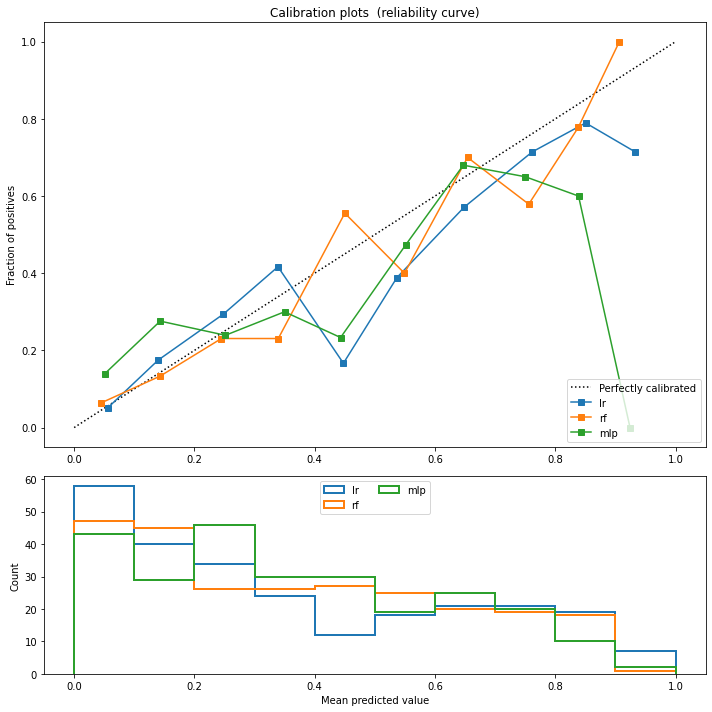

In [ ]:
'''
sklearn documentation used for the plots
https://scikit-learn.org/0.24/auto_examples/calibration/plot_compare_calibration.html#sphx-glr-auto-examples-calibration-plot-compare-calibration-py
'''
from sklearn.calibration import calibration_curve

# loading dataset
X, y = load_diabetes()
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for name, data, clf in model_instance[:3]:
    
    clf.fit(X_train, y_train)
    prob_pos = clf.predict_proba(X_test)[:, 1]

    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

**Calibration curve for Adult dataset**

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


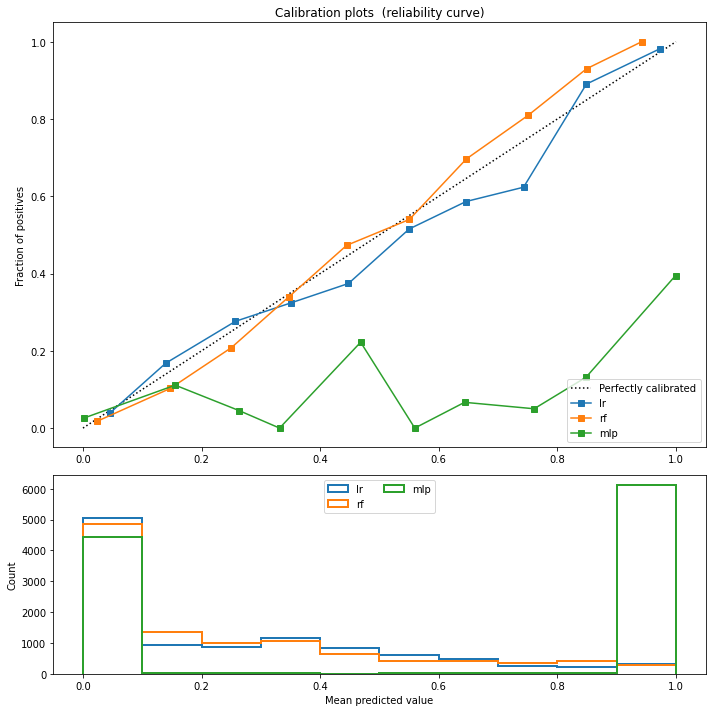

In [ ]:
# loading dataset
X, y = load_adult()
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for name, data, clf in model_instance[3:]:
    
    clf.fit(X_train, y_train)
    prob_pos = clf.predict_proba(X_test)[:, 1]

    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

### Part c

In [ ]:
!pip install dice-ml
import dice_ml
from dice_ml.utils import helpers 
from sklearn import metrics

def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    try:
        X = X.reshape(1, X.shape[0])
    except:
        X = X
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()

     |████████████████████████████████| 242 kB 8.4 MB/s 


In [ ]:
def dice_obj(model, backend='sklearn'):
    # provide the trained ML model to DiCE's model object
    m = dice_ml.Model(model=model, backend=backend)
    
    return m

In [ ]:
def dice_dataset(dataset='adult'):
    # reading the dataset
    if dataset == 'adult':
        df = pd.read_csv('adult.csv')
        df = pd.get_dummies(df)
        d = dice_ml.Data(dataframe=df, outcome_name='target',
                         continuous_features=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
                                              'hours-per-week']) 
    else:
        df = pd.read_csv('diabetes-2.csv')
        df = pd.get_dummies(df)
        d = dice_ml.Data(dataframe=df, outcome_name='Outcome',
                         continuous_features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                                              'BMI', 'DiabetesPedigreeFunction', 'Age'])  
        
    return d

In [ ]:
# creating function to generate CFs with different method
def generate_cf(model, dataset, X_test, method='random', n_cf=5, n_test=15):
    
    # creating dice obj
    m = dice_obj(model)
    
    # creating dice dataset
    d = dice_dataset(dataset)

    # initiate DiCE
    exp_random = dice_ml.Dice(d, m, method)
    
    # generate counterfactuals
    query_instances = X_test[:n_test]
    dice_exp_random = exp_random.generate_counterfactuals(query_instances, total_CFs=n_cf,
                                                          desired_class="opposite", verbose=False)
    # dice_exp_random = exp_random.generate_counterfactuals(
    # query_instances, total_CFs=4, desired_class="opposite",
    #    features_to_vary=['workclass', 'education', 'occupation', 'hours_per_week'])
#     dice_exp_random.visualize_as_dataframe(show_only_changes=True)
    
    return d, dice_exp_random

In [ ]:
# creating function for train test split
def get_train_test_split(dataset):
    if dataset == 'adult':
        X, y = load_adult()
    else:
        X, y = load_diabetes()
    
    return train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
# creating function for CFs

# diversity
def get_diversity(cf_list):
    return 0
    
# validity
def get_validity(test, cf_list):
    # to check validity each column in test will be checked against cl list columns
    num = len(cf_list) - sum([all(item in test for item in cf) for cf in cf_list])
    den = len(cf_list)
    validity = num/den
    
    return validity

# proximity
# assuming continuous proximity
def get_proximity(test, cf_list, mad_p):
    proximity = 0
    for i in range(len(cf_list)):
        cf = cf_list[i]
        distance = np.sum(np.abs(np.array(cf[0]) - np.array(test).ravel()))**0.5
        proximity += distance/mad_p[i]
    
    proximity = -proximity/len(cf_list)
    
    return proximity
  
# sparsity
def get_sparsity(test, cf_list):
    test = np.array(test).ravel()
    sparsity = 0
    for i in range(len(cf_list)):
        cf = np.array(cf_list[i]).ravel()
        sparsity += sum(test != cf)
    
    sparsity = 1 - sparsity/len(cf_list)/cf.shape[0]
    
    return sparsity

# diversity
def get_diversity(cfs_list):
    div = 0
    for i in range(len(cfs_list) - 1):
        for j in range(i+1, len(cfs_list)):
            a = np.array(cfs_list[i])
            b = np.array(cfs_list[j])
            dist = np.linalg.norm(a - b)
            
            div += dist/len(cfs_list)/len(cfs_list)
    div = div
    return div

In [ ]:
import json
n_cfs = 15

# creating output df
dice_methods = ['random', 'genetic']
output_df = pd.DataFrame(model_instance*2, columns=['model_name', 'dataset', 'model'])
output_df['dice_method'] = np.repeat(dice_methods, 6)

# creating columns for CFs 
validity_list = []
sparsity_list = []
diversity_list = []
proximity_list = []
in_distributionness_list = []

# iterating over different model class
for model_name, dataset, model, dice_method in output_df.values[:9, :]:
    
    # filtering dataset based on columns
    if dataset == 'adult':
        cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
    else:
        cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age']
    
    # doing train test split
    X_train, X_test, y_train, y_test = get_train_test_split(dataset)
    
    # generating counterfactual from test data and model
    d, cfs = generate_cf(model, dataset, X_test[:n_cfs], method=dice_method)
    
    # getting test sets and corresponding counterfactuals from the object
    if dice_method == 'random':
        cfs = json.loads(cfs.to_json())
        test_data = cfs['test_data']
        cfs_list = cfs['cfs_list']
        
    else:
        test_data = pd.concat([X_test[cols], y_test], axis=1)
        test_data = [list(t) for t in test_data[:n_cfs].values]
        cfs_list = []
        for i in range(n_cfs):
#             test_data.append(cfs.cf_examples_list[0].test_instance_df.values.tolist())
            cfs_list.append([list(c) for c in cfs.cf_examples_list[i].final_cfs_df.values])
            
    
    # calculating validity
    validity = np.mean([get_validity(test_data[i], cfs_list[i]) for i in range(len(cfs_list))])
    validity_list.append(validity)
    
    # calculating proximity
    mad_p = X_train.mad()
    proximity = np.mean([get_proximity(test_data[i], cfs_list[i], mad_p) for i in range(len(cfs_list))])
    proximity_list.append(proximity)
    
    # calculating sparsity
    sparsity = np.mean([get_sparsity(test_data[i], cfs_list[i]) for i in range(len(cfs_list))])
    sparsity_list.append(sparsity)
    
    # calculating diversity
    diversity = np.mean([get_diversity(cfs_list[i]) for i in range(len(cfs_list))])
    diversity_list.append(diversity)
    
    # calculating in distributionnes
    in_distributionness = np.mean([get_mmd_rbf(
        np.array(test_data[i]), np.array(cfs_list[i])) for i in range(len(cfs_list))])
    in_distributionness_list.append(in_distributionness)
    
    
output_df.loc[:9, 'validity'] = pd.Series(validity_list)
output_df.loc[:9, 'proximity'] = pd.Series(proximity_list)
output_df.loc[:9, 'sparsity'] = pd.Series(sparsity_list)
output_df.loc[:9, 'diversity'] = pd.Series(diversity_list)
output_df.loc[:9, 'in_distributionness'] = pd.Series(in_distributionness_list)

100%|██████████| 15/15 [00:02<00:00,  6.45it/s]


In [ ]:
output_df

,model_name,dataset,model,dice_method,validity,proximity,sparsity,diversity,in_distributionness
0,lr,diabeties,"LogisticRegression(C=10, class_weight=None, du...",random,1.000000,-2.078669,0.645926,59.325034,1.200001
1,rf,diabeties,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",random,1.000000,-2.076284,0.619259,66.836376,1.201331
2,mlp,diabeties,"MLPClassifier(activation='relu', alpha=0.0001,...",random,1.000000,-2.072746,0.622222,79.584856,1.199208
3,lr,adult,"LogisticRegression(C=10, class_weight=None, du...",random,1.000000,-50.130068,0.959204,24813.621932,1.195733
4,rf,adult,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",random,1.000000,-50.100619,0.962786,26669.137158,1.200094
5,mlp,adult,"MLPClassifier(activation='relu', alpha=0.0001,...",random,1.000000,-50.122063,0.950249,44242.692751,1.145959
6,lr,diabeties,"LogisticRegression(C=10, class_weight=None, du...",genetic,1.000000,-2.083951,0.288889,18.465226,1.150949
7,rf,diabeties,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",genetic,1.000000,-2.088698,0.280000,18.464902,1.156338
8,mlp,diabeties,"MLPClassifier(activation='relu', alpha=0.0001,...",genetic,0.986667,-2.085662,0.321481,26.245972,1.140154
9,lr,adult,"LogisticRegression(C=10, class_weight=None, du...",genetic,NaN,NaN,NaN,NaN,NaN
